#Predicting the finalists and the winner of WCC 2023.

In the following colab file, we are going to use data of previous world cup ODI matches between the teams and try to predict the finalists and winner depending upon their prevois encounters and the ground.

semi-final 1 : India vs New Zealand
semi-final 2 : South Africa vs Australia
final : winner of semi-final 1 vs winner of semi-final 2

We wil be using neural network, random forest and xgb booster models for the training and then we will observe that xgb is the appropriate choice of prediction. So we will use that to predict the results.

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


reading all the csv files containing match data for ODI world cups from 1975 to 2023(12 Nov)

In [ ]:
wc1975 = pd.read_csv('/content/drive/MyDrive/crickmetric/1975.csv')
wc1979 = pd.read_csv('/content/drive/MyDrive/crickmetric/1979.csv')
wc1983 = pd.read_csv('/content/drive/MyDrive/crickmetric/1983.csv')
wc1987 = pd.read_csv('/content/drive/MyDrive/crickmetric/1987.csv')
wc1992 = pd.read_csv('/content/drive/MyDrive/crickmetric/1992.csv')
wc1996 = pd.read_csv('/content/drive/MyDrive/crickmetric/1996.csv')
wc1999 = pd.read_csv('/content/drive/MyDrive/crickmetric/1999.csv')
# wc2003 = pd.read_csv('/content/drive/MyDrive/crickmetric/2003.csv')
# wc2007 = pd.read_csv('/content/drive/MyDrive/crickmetric/2007.csv')
# wc2011 = pd.read_csv('/content/drive/MyDrive/crickmetric/2011.csv')
# wc2015 = pd.read_csv('/content/drive/MyDrive/crickmetric/2015.csv')
# wc2019 = pd.read_csv('/content/drive/MyDrive/crickmetric/2019.csv')
# wc2023 = pd.read_csv('/content/drive/MyDrive/crickmetric/2023.csv')
wcrest = pd.read_csv('/content/drive/MyDrive/crickmetric/updated_file.csv')

In [ ]:
wcrest

,Team1,Team2,Format,Date,Venue,Result,Status,Venue_Country
0,West Indies,South Africa,ODI,"Feb 09, 2003",Cape Town,West Indies,Completed,South Africa
1,Zimbabwe,Namibia,ODI,"Feb 10, 2003",Harare,Zimbabwe,Completed,Zimbabwe
2,Sri Lanka,New Zealand,ODI,"Feb 10, 2003",Bloemfontein,Sri Lanka,Completed,South Africa
3,Australia,Pakistan,ODI,"Feb 11, 2003",Johannesburg,Australia,Completed,South Africa
4,Canada,Bangladesh,ODI,"Feb 11, 2003",Durban,Canada,Completed,South Africa
...,...,...,...,...,...,...,...,...
288,Sri Lanka,Bangladesh,ODI,"Nov 06, 2023",Delhi,Bangladesh,Completed,India
289,Afghanistan,Australia,ODI,"Nov 07, 2023",Wankhede,Australia,Completed,India
290,England,Netherlands,ODI,"Nov 08, 2023",Pune,England,Completed,India
291,Sri Lanka,New Zealand,ODI,"Nov 09, 2023",Bengaluru,New Zealand,Completed,India


In [ ]:
wcrest = wcrest.rename(columns={'Team1': 'Team 1'})
wcrest = wcrest.rename(columns={'Team2': 'Team 2'})

Concatinating to merge all the data into a single dataframe

In [ ]:
wc = pd.concat([wc1975,wc1979,wc1983,wc1987,wc1992,wc1996,wc1999,wcrest], ignore_index=True)

In [ ]:
wc.to_csv('updated_file.csv', index=False)

In [ ]:
wc

,Team 1,Team 2,Format,Date,Venue,Result,Status,Venue_Country
0,England,India,ODI,"Jun 07, 1975",Lord's,England,Completed,England
1,New Zealand,East Africa,ODI,"Jun 07, 1975",Birmingham,New Zealand,Completed,England
2,Australia,Pakistan,ODI,"Jun 07, 1975",Leeds,Australia,Completed,England
3,Sri Lanka,West Indies,ODI,"Jun 07, 1975",Manchester,West Indies,Completed,England
4,England,New Zealand,ODI,"Jun 11, 1975",Nottingham,England,Completed,England
...,...,...,...,...,...,...,...,...
491,Sri Lanka,Bangladesh,ODI,"Nov 06, 2023",Delhi,Bangladesh,Completed,India
492,Afghanistan,Australia,ODI,"Nov 07, 2023",Wankhede,Australia,Completed,India
493,England,Netherlands,ODI,"Nov 08, 2023",Pune,England,Completed,India
494,Sri Lanka,New Zealand,ODI,"Nov 09, 2023",Bengaluru,New Zealand,Completed,India


In [ ]:
wc2 = pd.read_csv('/content/drive/MyDrive/crickmetric/updated.csv')

In [ ]:
wc2

,Team_1,Team_2,Format,Date,Venue,Result,Status,Venue_Country
0,England,India,ODI,"Jun 07, 1975",Lord's,England,Completed,England
1,New_Zealand,East_Africa,ODI,"Jun 07, 1975",Birmingham,New_Zealand,Completed,England
2,Australia,Pakistan,ODI,"Jun 07, 1975",Leeds,Australia,Completed,England
3,Sri_Lanka,West_Indies,ODI,"Jun 07, 1975",Manchester,West_Indies,Completed,England
4,England,New_Zealand,ODI,"Jun 11, 1975",Nottingham,England,Completed,England
...,...,...,...,...,...,...,...,...
491,Sri_Lanka,Bangladesh,ODI,"Nov 06, 2023",Delhi,Bangladesh,Completed,India
492,Afghanistan,Australia,ODI,"Nov 07, 2023",Wankhede,Australia,Completed,India
493,England,Netherlands,ODI,"Nov 08, 2023",Pune,England,Completed,India
494,Sri_Lanka,New_Zealand,ODI,"Nov 09, 2023",Bengaluru,New_Zealand,Completed,India


In [ ]:
df = wc

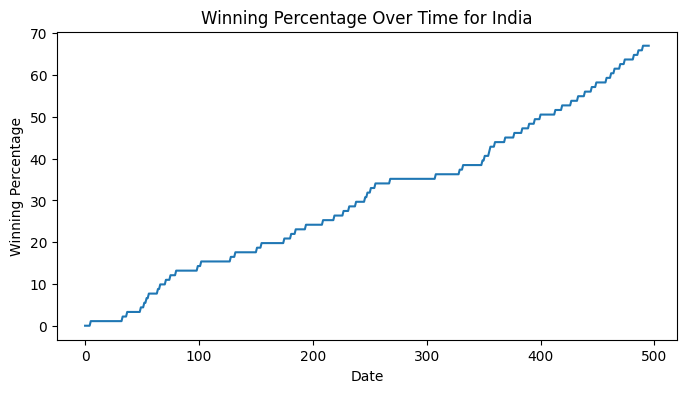

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


team_name = 'India'
mask_wins = (df['Result'] == team_name)

# Count the number of matches where the specified team played
total_matches = ((df['Team 1'] == team_name) | (df['Team 2'] == team_name)).sum()

# Calculate the winning percentage over time
df['Winning Percentage'] = mask_wins.expanding().sum() / total_matches * 100

# Plotting the winning percentage over time
plt.figure(figsize=(8, 4))
df['Winning Percentage'].plot()
plt.title(f'Winning Percentage Over Time for {team_name}')
plt.xlabel('Date')
plt.ylabel('Winning Percentage')
plt.show()


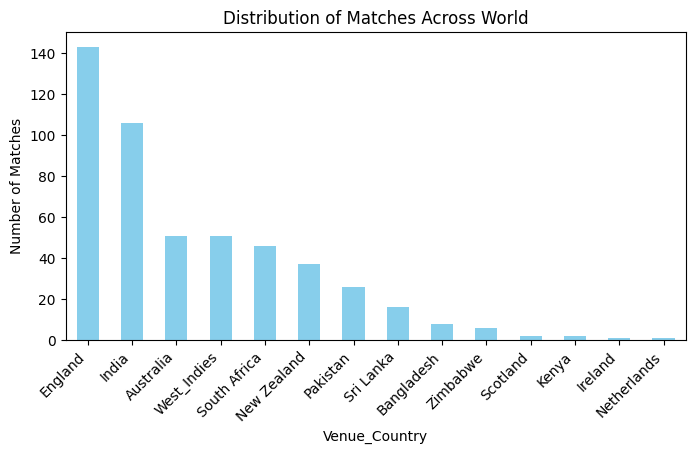

In [ ]:

venue_counts_countries = df['Venue_Country'].value_counts()

# Plotting a bar chart for venue distribution in India
plt.figure(figsize=(8, 4))
venue_counts_countries.plot(kind='bar', color='skyblue')
plt.title('Distribution of Matches Across World')
plt.xlabel('Venue_Country')
plt.ylabel('Number of Matches')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()


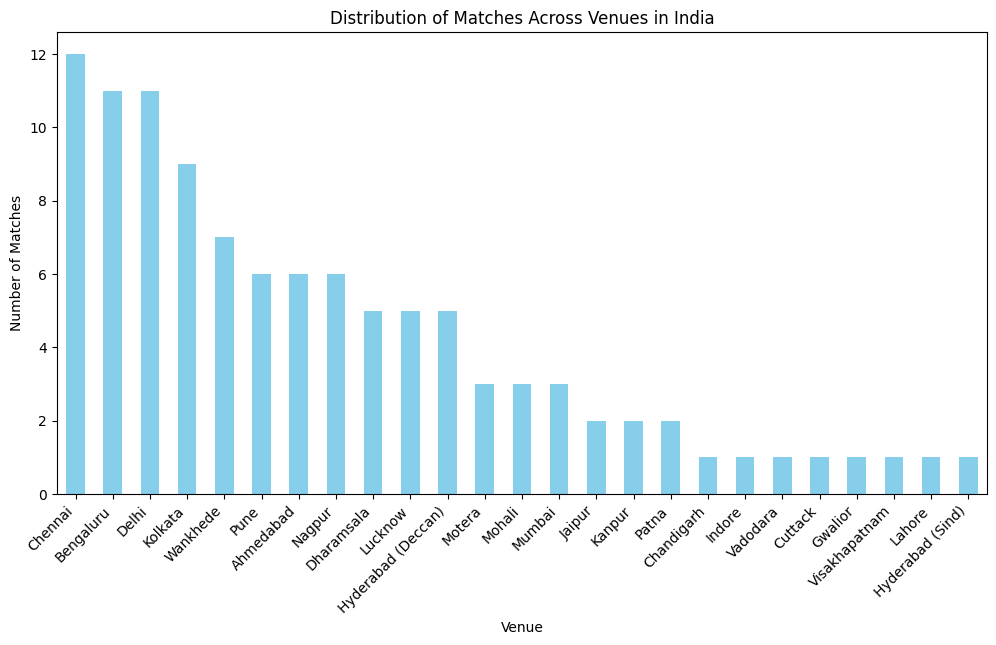

In [ ]:
df_india = df[df['Venue_Country'] == 'India']

# Count the number of matches at each venue in India
venue_counts_india = df_india['Venue'].value_counts()

# Plotting a bar chart for venue distribution in India
plt.figure(figsize=(12, 6))
venue_counts_india.plot(kind='bar', color='skyblue')
plt.title('Distribution of Matches Across Venues in India')
plt.xlabel('Venue')
plt.ylabel('Number of Matches')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()


<ipython-input-28-f99cb4fc62ca>:1: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  team_wins = df['Team 1'].append(df['Team 2']).value_counts()


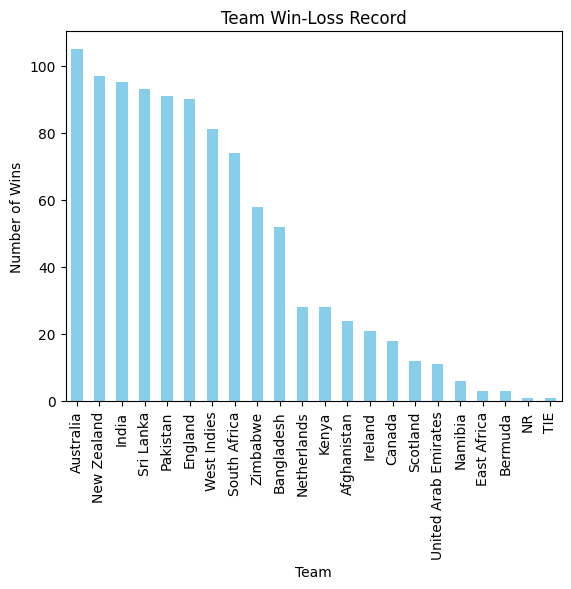

In [ ]:
team_wins = df['Team 1'].append(df['Team 2']).value_counts()
team_wins.plot(kind='bar', color='skyblue')
plt.title('Team Win-Loss Record')
plt.xlabel('Team')
plt.ylabel('Number of Wins')
plt.show()


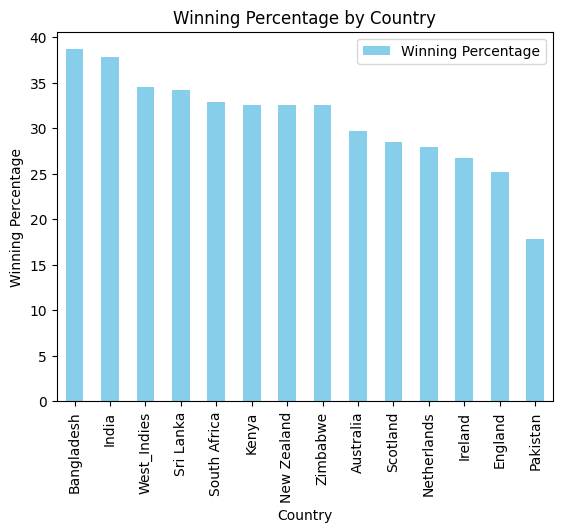

In [ ]:
country_stats = df.groupby('Venue_Country').agg({'Result': 'count', 'Winning Percentage': 'mean'})
country_stats.sort_values(by='Winning Percentage', ascending=False, inplace=True)
country_stats.plot(kind='bar', y='Winning Percentage', color='skyblue')
plt.title('Winning Percentage by Country')
plt.xlabel('Country')
plt.ylabel('Winning Percentage')
plt.show()


In [ ]:
df.columns

Index(['Team 1', 'Team 2', 'Venue', 'Result', 'Venue_Country', 'date'], dtype='object')

In [ ]:
df

,Team 1,Team 2,Format,Date,Venue,Result,Status,Venue_Country
0,England,India,ODI,"Jun 07, 1975",Lord's,England,Completed,England
1,New Zealand,East Africa,ODI,"Jun 07, 1975",Birmingham,New Zealand,Completed,England
2,Australia,Pakistan,ODI,"Jun 07, 1975",Leeds,Australia,Completed,England
3,Sri Lanka,West Indies,ODI,"Jun 07, 1975",Manchester,West Indies,Completed,England
4,England,New Zealand,ODI,"Jun 11, 1975",Nottingham,England,Completed,England
...,...,...,...,...,...,...,...,...
491,Sri Lanka,Bangladesh,ODI,"Nov 06, 2023",Delhi,Bangladesh,Completed,India
492,Afghanistan,Australia,ODI,"Nov 07, 2023",Wankhede,Australia,Completed,India
493,England,Netherlands,ODI,"Nov 08, 2023",Pune,England,Completed,India
494,Sri Lanka,New Zealand,ODI,"Nov 09, 2023",Bengaluru,New Zealand,Completed,India


In [ ]:
df.isnull().sum()

Team 1           0
Team 2           0
Format           0
Date             0
Venue            0
Result           0
Status           0
Venue_Country    0
dtype: int64

Only keeping the games which are marked as 'Completed'.

In [ ]:
df = df[df['Status'] == 'Completed']

In [ ]:
df

,Team 1,Team 2,Format,Date,Venue,Result,Status,Venue_Country
0,England,India,ODI,"Jun 07, 1975",Lord's,England,Completed,England
1,New Zealand,East Africa,ODI,"Jun 07, 1975",Birmingham,New Zealand,Completed,England
2,Australia,Pakistan,ODI,"Jun 07, 1975",Leeds,Australia,Completed,England
3,Sri Lanka,West Indies,ODI,"Jun 07, 1975",Manchester,West Indies,Completed,England
4,England,New Zealand,ODI,"Jun 11, 1975",Nottingham,England,Completed,England
...,...,...,...,...,...,...,...,...
491,Sri Lanka,Bangladesh,ODI,"Nov 06, 2023",Delhi,Bangladesh,Completed,India
492,Afghanistan,Australia,ODI,"Nov 07, 2023",Wankhede,Australia,Completed,India
493,England,Netherlands,ODI,"Nov 08, 2023",Pune,England,Completed,India
494,Sri Lanka,New Zealand,ODI,"Nov 09, 2023",Bengaluru,New Zealand,Completed,India


Removing the Format column as the data contains only ODI games.

In [ ]:
df = df.drop(['Format','Status'],axis=1)

Some of the games were cancelled due to various reasons, removing them from the dataframe.

In [ ]:
df = df[df['Result']!='CANCELED']

In [ ]:
df = df[df['Result']!='ABANDONED']

In [ ]:
df = df[df['Result']!='NR']

In [ ]:
df = df[df['Result']!='TIE']

In [ ]:
df

,Team 1,Team 2,Date,Venue,Result,Venue_Country
0,England,India,"Jun 07, 1975",Lord's,England,England
1,New Zealand,East Africa,"Jun 07, 1975",Birmingham,New Zealand,England
2,Australia,Pakistan,"Jun 07, 1975",Leeds,Australia,England
3,Sri Lanka,West Indies,"Jun 07, 1975",Manchester,West Indies,England
4,England,New Zealand,"Jun 11, 1975",Nottingham,England,England
...,...,...,...,...,...,...
491,Sri Lanka,Bangladesh,"Nov 06, 2023",Delhi,Bangladesh,India
492,Afghanistan,Australia,"Nov 07, 2023",Wankhede,Australia,India
493,England,Netherlands,"Nov 08, 2023",Pune,England,India
494,Sri Lanka,New Zealand,"Nov 09, 2023",Bengaluru,New Zealand,India


In [ ]:
df.isnull().sum()

Team 1           0
Team 2           0
Date             0
Venue            0
Result           0
Venue_Country    0
dtype: int64

In [ ]:
df.dtypes

Team 1           object
Team 2           object
Date             object
Venue            object
Result           object
Venue_Country    object
dtype: object

Now, converting Date to the float type via shows steps.

In [ ]:
df['date'] = pd.to_datetime(df['Date'])

In [ ]:
# df.set_index('date', inplace=True)

In [ ]:
df = df.drop(['Date'],axis=1)

In [ ]:
df

,Team 1,Team 2,Venue,Result,Venue_Country,date
0,England,India,Lord's,England,England,1975-06-07
1,New Zealand,East Africa,Birmingham,New Zealand,England,1975-06-07
2,Australia,Pakistan,Leeds,Australia,England,1975-06-07
3,Sri Lanka,West Indies,Manchester,West Indies,England,1975-06-07
4,England,New Zealand,Nottingham,England,England,1975-06-11
...,...,...,...,...,...,...
491,Sri Lanka,Bangladesh,Delhi,Bangladesh,India,2023-11-06
492,Afghanistan,Australia,Wankhede,Australia,India,2023-11-07
493,England,Netherlands,Pune,England,India,2023-11-08
494,Sri Lanka,New Zealand,Bengaluru,New Zealand,India,2023-11-09


In [ ]:
df.dtypes

Team 1                   object
Team 2                   object
Venue                    object
Result                   object
Venue_Country            object
date             datetime64[ns]
dtype: object

In [ ]:
def dt64_to_float(dt128):
  year = dt128.astype('M8[Y]')
  days = (dt128 - year).astype('timedelta64[D]')
  year_next = year + np.timedelta64(1, 'Y')
  days_of_year = (year_next.astype('M8[D]') - year.astype('M8[D]')).astype('timedelta64[D]')
  dt_float = 1970 + year.astype(float) + days / (days_of_year)
  return dt_float


In [ ]:
df['date'] = dt64_to_float(df['date'].to_numpy())


In [ ]:
df


,Team 1,Team 2,Venue,Result,Venue_Country,date
0,England,India,Lord's,England,England,1975.430137
1,New Zealand,East Africa,Birmingham,New Zealand,England,1975.430137
2,Australia,Pakistan,Leeds,Australia,England,1975.430137
3,Sri Lanka,West Indies,Manchester,West Indies,England,1975.430137
4,England,New Zealand,Nottingham,England,England,1975.441096
...,...,...,...,...,...,...
491,Sri Lanka,Bangladesh,Delhi,Bangladesh,India,2023.846575
492,Afghanistan,Australia,Wankhede,Australia,India,2023.849315
493,England,Netherlands,Pune,England,India,2023.852055
494,Sri Lanka,New Zealand,Bengaluru,New Zealand,India,2023.854795


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
df_temp = df[['Team 1', 'Team 2', 'Result']]

In [ ]:
df_temp

,Team 1,Team 2,Result
0,England,India,England
1,New Zealand,East Africa,New Zealand
2,Australia,Pakistan,Australia
3,Sri Lanka,West Indies,West Indies
4,England,New Zealand,England
...,...,...,...
491,Sri Lanka,Bangladesh,Bangladesh
492,Afghanistan,Australia,Australia
493,England,Netherlands,England
494,Sri Lanka,New Zealand,New Zealand


Creating a team name to an integer mapping for the categorical team names.

In [ ]:

# Dictionary containing country mappings
country_mapping = {
    'England': 0,
    'New Zealand': 1,
    'Australia': 2,
    'Sri Lanka': 3,
    'East Africa': 4,
    'Pakistan': 5,
    'India': 6,
    'West Indies': 7,
    'Canada': 8,
    'Zimbabwe': 9,
    'South Africa': 10,
    'Kenya': 11,
    'United Arab Emirates': 12,
    'Netherlands': 13,
    'Afghanistan': 14,
    'Bangladesh': 15,
    'Kenya': 16,
}

Transforming Team1, Team2 and Result columns based on the mapping created.

In [ ]:
df_temp_mapped = df_temp.apply(lambda col: col.map(country_mapping))
df_temp_mapped

,Team 1,Team 2,Result
0,0.0,6.0,0.0
1,1.0,4.0,1.0
2,2.0,5.0,2.0
3,3.0,7.0,7.0
4,0.0,1.0,0.0
...,...,...,...
491,3.0,15.0,15.0
492,14.0,2.0,2.0
493,0.0,13.0,0.0
494,3.0,1.0,1.0


In [ ]:
null_values_count = df_temp_mapped.isnull().sum()

# Display the count of null values for each column
print(null_values_count)

Team 1    19
Team 2    22
Result     7
dtype: int64


In [ ]:
indexes_with_null = df_temp_mapped[df_temp_mapped.isnull().any(axis=1)].index

# Display the indexes with null values
print(indexes_with_null)

Int64Index([164, 183, 190, 204, 216, 221, 227, 233, 241, 258, 260, 265, 268,
            271, 275, 277, 280, 284, 288, 292, 296, 298, 301, 316, 322, 329,
            334, 341, 344, 361, 362, 370, 372, 373, 380, 383, 386, 390, 391,
            396, 398],
           dtype='int64')


In [ ]:
print(df_temp_mapped.iloc[190])

Team 1    2.0
Team 2    2.0
Result    2.0
Name: 195, dtype: float64


In [ ]:
print(df_temp.iloc[155])

Team 1      Australia
Team 2    West Indies
Result      Australia
Name: 159, dtype: object


Integrating those changes in the original dataframe df.

In [ ]:
df[['Team 1']] = df_temp_mapped[['Team 1']]

In [ ]:
df[['Team 2']] = df_temp_mapped[['Team 2']]

In [ ]:
df[['Result']] = df_temp_mapped[['Result']]

In [ ]:
df

,Team 1,Team 2,Venue,Result,Venue_Country,date
0,0.0,6.0,Lord's,0.0,England,1975.430137
1,1.0,4.0,Birmingham,1.0,England,1975.430137
2,2.0,5.0,Leeds,2.0,England,1975.430137
3,3.0,7.0,Manchester,7.0,England,1975.430137
4,0.0,1.0,Nottingham,0.0,England,1975.441096
...,...,...,...,...,...,...
491,3.0,15.0,Delhi,15.0,India,2023.846575
492,14.0,2.0,Wankhede,2.0,India,2023.849315
493,0.0,13.0,Pune,0.0,India,2023.852055
494,3.0,1.0,Bengaluru,1.0,India,2023.854795


In [ ]:
null_values_count = df_temp_mapped.isnull().sum()

# Display the count of null values for each column
print(null_values_count)

Team 1    19
Team 2    22
Result     7
dtype: int64


Dropping the Nan containing rows.

In [ ]:
df_cleaned = df.dropna()

In [ ]:
df_cleaned

,Team 1,Team 2,Venue,Result,Venue_Country,date
0,0.0,6.0,Lord's,0.0,England,1975.430137
1,1.0,4.0,Birmingham,1.0,England,1975.430137
2,2.0,5.0,Leeds,2.0,England,1975.430137
3,3.0,7.0,Manchester,7.0,England,1975.430137
4,0.0,1.0,Nottingham,0.0,England,1975.441096
...,...,...,...,...,...,...
491,3.0,15.0,Delhi,15.0,India,2023.846575
492,14.0,2.0,Wankhede,2.0,India,2023.849315
493,0.0,13.0,Pune,0.0,India,2023.852055
494,3.0,1.0,Bengaluru,1.0,India,2023.854795


In [ ]:
df.shape

(477, 6)

In [ ]:
# Print the entire DataFrame
print(df_temp_mapped)

     Team 1  Team 2  Result
0       0.0     6.0     0.0
1       1.0     4.0     1.0
2       2.0     5.0     2.0
3       3.0     7.0     7.0
4       0.0     1.0     0.0
..      ...     ...     ...
491     3.0    15.0    15.0
492    14.0     2.0     2.0
493     0.0    13.0     0.0
494     3.0     1.0     1.0
495    14.0    10.0    10.0

[477 rows x 3 columns]


In [ ]:
df_cleaned

,Team 1,Team 2,Venue,Result,Venue_Country,date
0,0.0,6.0,Lord's,0.0,England,1975.430137
1,1.0,4.0,Birmingham,1.0,England,1975.430137
2,2.0,5.0,Leeds,2.0,England,1975.430137
3,3.0,7.0,Manchester,7.0,England,1975.430137
4,0.0,1.0,Nottingham,0.0,England,1975.441096
...,...,...,...,...,...,...
491,3.0,15.0,Delhi,15.0,India,2023.846575
492,14.0,2.0,Wankhede,2.0,India,2023.849315
493,0.0,13.0,Pune,0.0,India,2023.852055
494,3.0,1.0,Bengaluru,1.0,India,2023.854795


In [ ]:
label_encoder1 = LabelEncoder()
label_encoder2 = LabelEncoder()

Transofrming the Venue and Venue_Country columns using LabelEncoder

In [ ]:
df_cleaned['Venue'] = label_encoder1.fit_transform(df_cleaned['Venue'])

<ipython-input-36-6c47ca74d033>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Venue'] = label_encoder1.fit_transform(df_cleaned['Venue'])


In [ ]:
df_cleaned['Venue_Country'] = label_encoder2.fit_transform(df_cleaned['Venue_Country'])

<ipython-input-37-90ed16b936ec>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Venue_Country'] = label_encoder2.fit_transform(df_cleaned['Venue_Country'])


In [ ]:
df_cleaned.dtypes

Team 1           float64
Team 2           float64
Venue              int64
Result           float64
Venue_Country      int64
date             float64
dtype: object

In [ ]:
df_cleaned

,Team 1,Team 2,Venue,Result,Venue_Country,date
0,0.0,6.0,63,0.0,2,1975.430137
1,1.0,4.0,10,1.0,2,1975.430137
2,2.0,5.0,61,2.0,2,1975.430137
3,3.0,7.0,65,7.0,2,1975.430137
4,0.0,1.0,78,0.0,2,1975.441096
...,...,...,...,...,...,...
491,3.0,15.0,32,15.0,3,2023.846575
492,14.0,2.0,101,2.0,3,2023.849315
493,0.0,13.0,89,0.0,3,2023.852055
494,3.0,1.0,7,1.0,3,2023.854795


Creating a new datframe for predicting the finalist and winners

In [ ]:
df_pred1 = df_cleaned[['Venue','Result','Venue_Country','Team 1','Team 2', 'date']]

In [ ]:
df_pred1

,Venue,Result,Venue_Country,Team 1,Team 2,date
0,63,0.0,2,0.0,6.0,1975.430137
1,10,1.0,2,1.0,4.0,1975.430137
2,61,2.0,2,2.0,5.0,1975.430137
3,65,7.0,2,3.0,7.0,1975.430137
4,78,0.0,2,0.0,1.0,1975.441096
...,...,...,...,...,...,...
491,32,15.0,3,3.0,15.0,2023.846575
492,101,2.0,3,14.0,2.0,2023.849315
493,89,0.0,3,0.0,13.0,2023.852055
494,7,1.0,3,3.0,1.0,2023.854795


In [ ]:
nan_count = df_pred1.isna().sum()
nan_count

Venue            0
Result           0
Venue_Country    0
Team 1           0
Team 2           0
date             0
dtype: int64

Separating the input and output variables for our multi-class classification problem where each output tells us which of the two inout teams would win the game.

In [ ]:
X = df_pred1[['Venue','Venue_Country','Team 1','Team 2','date']]
Y = df_pred1[['Result']]

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

In [ ]:
X

,Venue,Venue_Country,Team 1,Team 2,date
0,63,2,0.0,6.0,1975.430137
1,10,2,1.0,4.0,1975.430137
2,61,2,2.0,5.0,1975.430137
3,65,2,3.0,7.0,1975.430137
4,78,2,0.0,1.0,1975.441096
...,...,...,...,...,...
491,32,3,3.0,15.0,2023.846575
492,101,3,14.0,2.0,2023.849315
493,89,3,0.0,13.0,2023.852055
494,7,3,3.0,1.0,2023.854795


In [ ]:
Y

,Result
0,0.0
1,1.0
2,2.0
3,7.0
4,0.0
...,...
491,15.0
492,2.0
493,0.0
494,1.0


In [ ]:
from tensorflow import keras

Creating a sequencial model using different layers for the ANN. Tried out a few different architectural configurations for better accuracy and settled on the given one.

In [ ]:
model = keras.models.Sequential([
    keras.layers.InputLayer(input_shape=(5,)),
    keras.layers.BatchNormalization(), #keras.layers.BatchNormalization()
    keras.layers.Dense(64, activation='relu',kernel_initializer='he_normal', kernel_regularizer = keras.regularizers.l2(0.02)),
    keras.layers.Dense(128, activation='relu',kernel_initializer='he_normal', kernel_regularizer = keras.regularizers.l2(0.02)),  #kernel_initializer = '' #kernel_regularizer = keras.regularizers.l2(0.01)
    #keras.layers.BatchNormalization(),
    #keras.layers.Dropout(0.2),
    keras.layers.Dense(128, activation='relu',kernel_initializer='he_normal', kernel_regularizer = keras.regularizers.l2(0.02)),  #kernel_initializer = '' #kernel_regularizer = keras.regularizers.l2(0.01)
    #keras.layers.BatchNormalization(),
    #keras.layers.Dropout(0.2),
    keras.layers.Dense(128, activation='relu',kernel_initializer='he_normal', kernel_regularizer = keras.regularizers.l2(0.02)),
    #keras.layers.BatchNormalization(),
    #keras.layers.Dropout(0.2),
    keras.layers.Dense(128, activation='relu',kernel_initializer='he_normal', kernel_regularizer = keras.regularizers.l2(0.02)),
    #keras.layers.BatchNormalization(),
    #keras.layers.Dropout(0.2),
    keras.layers.Dense(256, activation='relu',kernel_initializer='he_normal', kernel_regularizer = keras.regularizers.l2(0.02)),
    keras.layers.Dense(256, activation='relu',kernel_initializer='he_normal', kernel_regularizer = keras.regularizers.l2(0.02)),
    #keras.layers.Dense(128, activation='relu',kernel_regularizer = keras.regularizers.l2(0.02)),
    keras.layers.Dense(17, activation='softmax')
])

In [ ]:
# from sklearn.utils import class_weight

# from sklearn.utils.class_weight import compute_class_weight
# class_weights = compute_class_weight(class_weight = "balanced", classes= np.unique(Y), y= Y.values.reshape(-1)
# )
# class_weight_dict = dict(enumerate(class_weights))

In [ ]:
X_scaled = scaler.fit_transform(X)

Compiling and training the neural network with a given validation ratio.

In [ ]:
optimizer = keras.optimizers.Adam(learning_rate=0.001)

early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_scheduler = keras.callbacks.LearningRateScheduler(lambda epoch: 0.001 * 0.9 ** epoch)

model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_scaled, Y, epochs=20, batch_size=32, validation_split=0.1)

Epoch 1/20
13/13 [==============================] - 9s 41ms/step - loss: 44.1521 - accuracy: 0.1582 - val_loss: 41.7935 - val_accuracy: 0.2273
Epoch 2/20
13/13 [==============================] - 0s 12ms/step - loss: 39.0593 - accuracy: 0.2245 - val_loss: 37.3006 - val_accuracy: 0.1591
Epoch 3/20
13/13 [==============================] - 0s 11ms/step - loss: 34.7642 - accuracy: 0.2959 - val_loss: 33.3611 - val_accuracy: 0.2500
Epoch 4/20
13/13 [==============================] - 0s 11ms/step - loss: 31.0125 - accuracy: 0.2934 - val_loss: 30.2274 - val_accuracy: 0.2045
Epoch 5/20
13/13 [==============================] - 0s 11ms/step - loss: 27.8401 - accuracy: 0.2908 - val_loss: 26.9645 - val_accuracy: 0.2955
Epoch 6/20
13/13 [==============================] - 0s 11ms/step - loss: 24.9651 - accuracy: 0.3444 - val_loss: 24.4264 - val_accuracy: 0.2045
Epoch 7/20
13/13 [==============================] - 0s 11ms/step - loss: 22.5323 - accuracy: 0.3316 - val_loss: 22.3746 - val_accuracy: 0.2045

Now, trying to predict the same feature using random forest classifier and checking if that can provide better accuracy.

In [ ]:
df_pred1

,Venue,Result,Venue_Country,Team 1,Team 2,date
0,63,0.0,2,0.0,6.0,1975.430137
1,10,1.0,2,1.0,4.0,1975.430137
2,61,2.0,2,2.0,5.0,1975.430137
3,65,7.0,2,3.0,7.0,1975.430137
4,78,0.0,2,0.0,1.0,1975.441096
...,...,...,...,...,...,...
491,32,15.0,3,3.0,15.0,2023.846575
492,101,2.0,3,14.0,2.0,2023.849315
493,89,0.0,3,0.0,13.0,2023.852055
494,7,1.0,3,3.0,1.0,2023.854795


Creating dummy variables for each team using get_dummies() function. Also, splitting the data into iput and output features.

In [ ]:
final = pd.get_dummies(df_pred1, prefix=['Team 1', 'Team 2'], columns=['Team 1', 'Team 2'])
XR = final.drop(['Result'],axis=1)
YR = final[['Result']]

Splitting the data into training and testing sets, using 90% of the data for training while the remaining 10% for testing.

In [ ]:
# Split the data into training and testing sets using a test size of 20% and a random state of 42.
split_index = int(0.90 * len(df))

X_train = XR.iloc[:split_index]
X_test = XR.iloc[split_index:]

Y_train = YR.iloc[:split_index]
Y_test = YR.iloc[split_index:]

In [ ]:
X_train

,Venue,Venue_Country,date,Team 1_0.0,Team 1_1.0,Team 1_2.0,Team 1_3.0,Team 1_4.0,Team 1_5.0,Team 1_6.0,...,Team 2_6.0,Team 2_7.0,Team 2_8.0,Team 2_9.0,Team 2_10.0,Team 2_12.0,Team 2_13.0,Team 2_14.0,Team 2_15.0,Team 2_16.0
0,63,2,1975.430137,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,10,2,1975.430137,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,61,2,1975.430137,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,65,2,1975.430137,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,78,2,1975.441096,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
484,59,3,2023.830137,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
485,89,3,2023.832877,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
486,101,3,2023.835616,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
487,64,3,2023.838356,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


Scaling the inputs using StandardScaler()

In [ ]:
X_train_scaled = scaler.fit_transform(X_train)

In [ ]:
X_test_scaled = scaler.transform(X_test)

Training the randomforestclassifier for 10 depth on the X_train and checking the accuracy on the testing data.

In [ ]:
# Import the Random forest module from sklearn
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestClassifier

# Create an Random forest classifier with a linear kernel
rf = RandomForestClassifier(n_estimators=100, max_depth=10,
                              random_state=42)

# Fit the classifier on the training data
rf.fit(X_train_scaled, Y_train)

# Make predictions on the test data
pred = rf.predict(X_test_scaled)

# Calculating training set score:
score = rf.score(X_train_scaled, Y_train)

# Calculating test set score:
score2 = rf.score(X_test_scaled, Y_test)

# Printing the training set accuracy with 3 decimal places
print("Training set accuracy: ", '%.3f'%(score))

# Printing the test set accuracy with 3 decimal places
print("Test set accuracy: ", '%.3f'%(score2))

<ipython-input-48-4cb349c6d0fc>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train_scaled, Y_train)


Training set accuracy:  0.965
Test set accuracy:  0.857


Also, trying RidgeClassifier for the same task.

In [ ]:
# Import the Random forest module from sklearn
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestClassifier

# Create an Random forest classifier with a linear kernel
#rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

rf = Ridge()

# Fit the classifier on the training data
rf.fit(X_train_scaled, Y_train)

# Make predictions on the test data
pred = rf.predict(X_test_scaled)

# Calculating training set score:
score = rf.score(X_train_scaled, Y_train)

# Calculating test set score:
score2 = rf.score(X_test_scaled, Y_test)

# Printing the training set accuracy with 3 decimal places
print("Training set accuracy: ", '%.3f'%(score))

# Printing the test set accuracy with 3 decimal places
print("Test set accuracy: ", '%.3f'%(score2))

Training set accuracy:  0.533
Test set accuracy:  0.561


In [ ]:
# Import necessary libraries
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'bootstrap': [True, False],
    'max_depth': [10,15, 20,25, 30, 40],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [100, 200, 250, 300, 600]
}

# Create a Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, Y_train)

# Get the best parameters and the corresponding model
best_params = grid_search.best_params_
best_rf = grid_search.best_estimator_

# Print the best parameters
print("Best Hyperparameters:", best_params)

# Print the cross-validated accuracy for each combination of hyperparameters
cv_results = grid_search.cv_results_
for mean_score, params in zip(cv_results['mean_test_score'], cv_results['params']):
    print("Accuracy: %.3f for %r" % (mean_score, params))

# Make predictions on the test data using the best model
pred = best_rf.predict(X_test_scaled)

# Calculating test set score with the best model
best_score = best_rf.score(X_test_scaled, Y_test)

# Printing the test set accuracy with 3 decimal places for the best model
print("Best Test set accuracy: ", '%.3f'%(best_score))

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:909: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best Hyperparameters: {'bootstrap': True, 'max_depth': 15, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 250}
Accuracy: 0.664 for {'bootstrap': True, 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy: 0.674 for {'bootstrap': True, 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy: 0.681 for {'bootstrap': True, 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 250}
Accuracy: 0.671 for {'bootstrap': True, 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Accuracy: 0.662 for {'bootstrap': True, 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 600}
Accuracy: 0.667 for {'bootstrap': True, 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1,

In [ ]:
import xgboost as xgb
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
dtrain = xgb.DMatrix(X_train_scaled, label=Y_train)
dtest = xgb.DMatrix(X_test_scaled, label=Y_test)

# Set the parameters for XGBoost for multi-class classification
params = {
    'objective': 'multi:softmax',  # Specify multi-class classification
    'num_class': 20,  # Number of classes in the dataset
    'max_depth': 20,
    'learning_rate': 0.001,
    'eval_metric': 'mlogloss'  # Multi-class logloss
}

# Train the XGBoost model
num_round = 100
bst = xgb.train(params, dtrain, num_round)

# Make predictions on the test set
y_pred = bst.predict(dtest)

# Convert predicted class indices to integers
y_pred = y_pred.astype(int)

# Evaluate the accuracy and other metrics of the model
accuracy = accuracy_score(Y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.8571428571428571


As apparent from the results above, XGB is the best classifier for the given dataet(as it often is for datasets with lesser number of instances). So, now we will tryy to predict the winners of tehr emaining games of teh ODI WC 2023.

In [ ]:
new1 = {'Team 1': 'India', 'Team 2': 'New Zealand', 'Format': 'ODI', 'Date' : 'Nov 15, 2023', 'Venue' : 'Wankhede', 'Venue_Country' : "India"}
dfnew1 = pd.DataFrame(new1,[1000])
dfnew1['date'] = pd.to_datetime(dfnew1['Date'])
dfnew1['date'] = dt64_to_float(dfnew1['date'].to_numpy())
dfnew1 = dfnew1.drop(['Date'],axis=1)

In [ ]:
new2 = {'Team 1': 'South Africa', 'Team 2': 'Australia', 'Format': 'ODI', 'Date' : 'Nov 16, 2023', 'Venue' : 'Kolkata', 'Venue_Country' : "India"}
dfnew2 = pd.DataFrame( new2,[1001])
dfnew2['date'] = pd.to_datetime(dfnew2['Date'])
dfnew2['date'] = dt64_to_float(dfnew2['date'].to_numpy())
dfnew2 = dfnew2.drop(['Date'],axis=1)

After creating dataframes for semi-final games, we concatenate them to use as a test set to predict the results for the same.

In [ ]:
dfnew = pd.concat([dfnew1,dfnew2])

In [ ]:
dfnew

,Team 1,Team 2,Format,Venue,Venue_Country,date
1000,India,New Zealand,ODI,Wankhede,India,2023.871233
1001,South Africa,Australia,ODI,Kolkata,India,2023.873973


Mapping the Teams with their respective categorical number.

In [ ]:
dfnew_temp = dfnew[['Team 1','Team 2']]
dfnew_temp_mapped = dfnew_temp.apply(lambda col: col.map(country_mapping))
dfnew_temp_mapped

,Team 1,Team 2
1000,6,1
1001,10,2


Taking the mapped team data in the original dfnew.

In [ ]:
dfnew['Team 1'] = dfnew_temp_mapped['Team 1']
dfnew['Team 2'] = dfnew_temp_mapped['Team 2']
dfnew

,Team 1,Team 2,Format,Venue,Venue_Country,date
1000,6,1,ODI,Wankhede,India,2023.871233
1001,10,2,ODI,Kolkata,India,2023.873973


Using the labelencoders fittted on the training data to transform the Venue and Venue_Country

In [ ]:
dfnew['Venue'] = label_encoder1.transform(dfnew['Venue'])
dfnew['Venue_Country'] = label_encoder2.transform(dfnew['Venue_Country'])
dfnew

,Team 1,Team 2,Format,Venue,Venue_Country,date
1000,6,1,ODI,101,3,2023.871233
1001,10,2,ODI,59,3,2023.873973


In [ ]:
dfnew

,Team 1,Team 2,Format,Venue,Venue_Country,date
1000,6,1,ODI,101,3,2023.871233
1001,10,2,ODI,59,3,2023.873973


In [ ]:
dfnew = dfnew.drop(['Format'],axis=1)
dfnew

,Team 1,Team 2,Venue,Venue_Country,date
1000,6,1,101,3,2023.871233
1001,10,2,59,3,2023.873973


In [ ]:
dfnew = dfnew[['Venue', 'Venue_Country', 'Team 1', 'Team 2', 'date']]

Creating dfFul in order to get proper dummy columns for prediction instances.

In [ ]:
dfFull = pd.concat([df_pred1,dfnew])
dfFull

,Venue,Result,Venue_Country,Team 1,Team 2,date
0,63,0.0,2,0.0,6.0,1975.430137
1,10,1.0,2,1.0,4.0,1975.430137
2,61,2.0,2,2.0,5.0,1975.430137
3,65,7.0,2,3.0,7.0,1975.430137
4,78,0.0,2,0.0,1.0,1975.441096
...,...,...,...,...,...,...
493,89,0.0,3,0.0,13.0,2023.852055
494,7,1.0,3,3.0,1.0,2023.854795
495,1,10.0,3,14.0,10.0,2023.857534
1000,101,NaN,3,6.0,1.0,2023.871233


Creating input and output sets.

In [ ]:
Xnew = dfFull.drop(['Result'],axis=1)
Ynew = dfFull[['Result']]

In [ ]:
Xnew

,Venue,Venue_Country,Team 1,Team 2,date
0,63,2,0.0,6.0,1975.430137
1,10,2,1.0,4.0,1975.430137
2,61,2,2.0,5.0,1975.430137
3,65,2,3.0,7.0,1975.430137
4,78,2,0.0,1.0,1975.441096
...,...,...,...,...,...
493,89,3,0.0,13.0,2023.852055
494,7,3,3.0,1.0,2023.854795
495,1,3,14.0,10.0,2023.857534
1000,101,3,6.0,1.0,2023.871233


In [ ]:
Ynew

,Result
0,0.0
1,1.0
2,2.0
3,7.0
4,0.0
...,...
493,0.0
494,1.0
495,10.0
1000,NaN


Dropping last 2 rows as to use Ynew as the labels for the training data.

In [ ]:
Ynew = Ynew.drop(index=1000)
Ynew = Ynew.drop(index=1001)
Ynew

,Result
0,0.0
1,1.0
2,2.0
3,7.0
4,0.0
...,...
491,15.0
492,2.0
493,0.0
494,1.0


Creating dummy columns for the entire input dataset.

In [ ]:
Xnew_with_dummies = pd.get_dummies(Xnew, prefix=['Team 1', 'Team 2'], columns=['Team 1', 'Team 2'])
Xnew_with_dummies

,Venue,Venue_Country,date,Team 1_0.0,Team 1_1.0,Team 1_2.0,Team 1_3.0,Team 1_4.0,Team 1_5.0,Team 1_6.0,Team 1_7.0,Team 1_8.0,Team 1_9.0,Team 1_10.0,Team 1_12.0,Team 1_13.0,Team 1_14.0,Team 1_15.0,Team 1_16.0,Team 2_0.0,Team 2_1.0,Team 2_2.0,Team 2_3.0,Team 2_4.0,Team 2_5.0,Team 2_6.0,Team 2_7.0,Team 2_8.0,Team 2_9.0,Team 2_10.0,Team 2_12.0,Team 2_13.0,Team 2_14.0,Team 2_15.0,Team 2_16.0
0,63,2,1975.430137,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,10,2,1975.430137,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,61,2,1975.430137,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,65,2,1975.430137,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,78,2,1975.441096,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493,89,3,2023.852055,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
494,7,3,2023.854795,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
495,1,3,2023.857534,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1000,101,3,2023.871233,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Splitting such that only what we want to predict the result for is in the X_test.

In [ ]:
train_indices, test_indices = train_test_split(range(len(Xnew_with_dummies)), test_size=2, shuffle=False)

X_train, X_test = Xnew_with_dummies.iloc[train_indices], Xnew_with_dummies.iloc[test_indices]

In [ ]:
X_train

,Venue,Venue_Country,date,Team 1_0.0,Team 1_1.0,Team 1_2.0,Team 1_3.0,Team 1_4.0,Team 1_5.0,Team 1_6.0,Team 1_7.0,Team 1_8.0,Team 1_9.0,Team 1_10.0,Team 1_12.0,Team 1_13.0,Team 1_14.0,Team 1_15.0,Team 1_16.0,Team 2_0.0,Team 2_1.0,Team 2_2.0,Team 2_3.0,Team 2_4.0,Team 2_5.0,Team 2_6.0,Team 2_7.0,Team 2_8.0,Team 2_9.0,Team 2_10.0,Team 2_12.0,Team 2_13.0,Team 2_14.0,Team 2_15.0,Team 2_16.0
0,63,2,1975.430137,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,10,2,1975.430137,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,61,2,1975.430137,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,65,2,1975.430137,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,78,2,1975.441096,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491,32,3,2023.846575,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
492,101,3,2023.849315,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
493,89,3,2023.852055,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
494,7,3,2023.854795,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
pd.set_option('display.max_columns', 500)


In [ ]:
X_test

,Venue,Venue_Country,date,Team 1_0.0,Team 1_1.0,Team 1_2.0,Team 1_3.0,Team 1_4.0,Team 1_5.0,Team 1_6.0,Team 1_7.0,Team 1_8.0,Team 1_9.0,Team 1_10.0,Team 1_12.0,Team 1_13.0,Team 1_14.0,Team 1_15.0,Team 1_16.0,Team 2_0.0,Team 2_1.0,Team 2_2.0,Team 2_3.0,Team 2_4.0,Team 2_5.0,Team 2_6.0,Team 2_7.0,Team 2_8.0,Team 2_9.0,Team 2_10.0,Team 2_12.0,Team 2_13.0,Team 2_14.0,Team 2_15.0,Team 2_16.0
1000,101,3,2023.871233,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1001,59,3,2023.873973,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


Scaling the data using mean and variance of X_train

In [ ]:
scaler6 = StandardScaler()
X_train_scaled = scaler6.fit_transform(X_train)
X_test_scaled = scaler6.transform(X_test)

Retraining the XGB model on the entire training dataset(earlier it was trained on the subset of it, while remaining was used for testing purposes).

In [ ]:
dtrain = xgb.DMatrix(X_train_scaled, label=Ynew)

# Set the parameters for XGBoost for multi-class classification
params = {
    'objective': 'multi:softmax',  # Specify multi-class classification
    'num_class': 20,  # Number of classes in the dataset
    'max_depth': 20,
    'learning_rate': 0.001,
    'eval_metric': 'mlogloss'  # Multi-class logloss
}

# Train the XGBoost model
num_round = 100
bst = xgb.train(params, dtrain, num_round)





Predicting the winners for the semi-finals game.

In [ ]:
dtest = xgb.DMatrix(X_test_scaled)
# Make predictions on the test set
y_pred = bst.predict(dtest)

# Convert predicted class indices to integers
y_pred = y_pred.astype(int)

In [ ]:
y_pred

array([6, 2])

##As we can see, India and Australia are predicted to be the finalists of WCC-23.

Now, predicting the result of the final game.

In [ ]:
finalGame = {'Team 1': 'India', 'Team 2': 'Australia', 'Format': 'ODI', 'Date' : 'Nov 19, 2023', 'Venue' : 'Ahmedabad', 'Venue_Country' : "India"}
finaldf = pd.DataFrame(finalGame,[1002])
finaldf['date'] = pd.to_datetime(finaldf['Date'])
finaldf['date'] = dt64_to_float(finaldf['date'].to_numpy())
finaldf = finaldf.drop(['Date'],axis=1)

In [ ]:
finaldf

,Team 1,Team 2,Format,Venue,Venue_Country,date
1002,India,Australia,ODI,Ahmedabad,India,2023.882192


In [ ]:
dffinal_temp = finaldf[['Team 1','Team 2']]
dffinal_temp_mapped = dffinal_temp.apply(lambda col: col.map(country_mapping))
dffinal_temp_mapped

,Team 1,Team 2
1002,6,2


In [ ]:
finaldf['Team 1'] = dffinal_temp_mapped['Team 1']
finaldf['Team 2'] = dffinal_temp_mapped['Team 2']
finaldf

,Team 1,Team 2,Format,Venue,Venue_Country,date
1002,6,2,ODI,Ahmedabad,India,2023.882192


In [ ]:
finaldf['Venue'] = label_encoder1.transform(finaldf['Venue'])
finaldf['Venue_Country'] = label_encoder2.transform(finaldf['Venue_Country'])


In [ ]:
finaldf = finaldf.drop(['Format'],axis=1)
finaldf

,Team 1,Team 2,Venue,Venue_Country,date
1002,6,2,1,3,2023.882192


In [ ]:
finaldf

,Team 1,Team 2,Venue,Venue_Country,date
1002,6,2,1,3,2023.882192


In [ ]:
finaldf = finaldf[['Venue', 'Venue_Country', 'Team 1', 'Team 2', 'date']]

In [ ]:
dfFulll = pd.concat([df_pred1,finaldf])
dfFulll

,Venue,Result,Venue_Country,Team 1,Team 2,date
0,63,0.0,2,0.0,6.0,1975.430137
1,10,1.0,2,1.0,4.0,1975.430137
2,61,2.0,2,2.0,5.0,1975.430137
3,65,7.0,2,3.0,7.0,1975.430137
4,78,0.0,2,0.0,1.0,1975.441096
...,...,...,...,...,...,...
492,101,2.0,3,14.0,2.0,2023.849315
493,89,0.0,3,0.0,13.0,2023.852055
494,7,1.0,3,3.0,1.0,2023.854795
495,1,10.0,3,14.0,10.0,2023.857534


In [ ]:
Xnewfinal = dfFulll.drop(['Result'],axis=1)
Ynewfinal = dfFulll[['Result']]

In [ ]:
Ynewfinal = Ynewfinal.drop(index=1002)
Ynewfinal

,Result
0,0.0
1,1.0
2,2.0
3,7.0
4,0.0
...,...
491,15.0
492,2.0
493,0.0
494,1.0


In [ ]:
Xnewfinal_with_dummies = pd.get_dummies(Xnewfinal, prefix=['Team 1', 'Team 2'], columns=['Team 1', 'Team 2'])
Xnewfinal_with_dummies

,Venue,Venue_Country,date,Team 1_0.0,Team 1_1.0,Team 1_2.0,Team 1_3.0,Team 1_4.0,Team 1_5.0,Team 1_6.0,Team 1_7.0,Team 1_8.0,Team 1_9.0,Team 1_10.0,Team 1_12.0,Team 1_13.0,Team 1_14.0,Team 1_15.0,Team 1_16.0,Team 2_0.0,Team 2_1.0,Team 2_2.0,Team 2_3.0,Team 2_4.0,Team 2_5.0,Team 2_6.0,Team 2_7.0,Team 2_8.0,Team 2_9.0,Team 2_10.0,Team 2_12.0,Team 2_13.0,Team 2_14.0,Team 2_15.0,Team 2_16.0
0,63,2,1975.430137,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,10,2,1975.430137,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,61,2,1975.430137,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,65,2,1975.430137,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,78,2,1975.441096,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
492,101,3,2023.849315,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
493,89,3,2023.852055,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
494,7,3,2023.854795,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
495,1,3,2023.857534,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [ ]:
train_indices, test_indices = train_test_split(range(len(Xnewfinal_with_dummies)), test_size=1, shuffle=False)

X_train, X_test = Xnewfinal_with_dummies.iloc[train_indices], Xnewfinal_with_dummies.iloc[test_indices]

In [ ]:
X_test_scaled = scaler6.transform(X_test)

In [ ]:
pd.set_option('display.max_columns', 500)

In [ ]:
X_test_scaled

array([[-1.73163049, -0.38386558,  1.52053619, -0.326495  , -0.30899415,
        -0.39559913, -0.326495  , -0.04794633, -0.33077902,  2.94769213,
        -0.28615705, -0.15321285, -0.2569332 , -0.28143902, -0.1077076 ,
        -0.15321285, -0.16823165, -0.23052136, -0.18875766, -0.32217614,
        -0.37598039,  3.23630719, -0.326495  , -0.06788442, -0.326495  ,
        -0.33077902, -0.32217614, -0.13671719, -0.2413554 , -0.3       ,
        -0.1077076 , -0.18875766, -0.16087993, -0.23598744, -0.16087993]])

In [ ]:
dtest = xgb.DMatrix(X_test_scaled)
# Make predictions on the test set
y_pred = bst.predict(dtest)

# Convert predicted class indices to integers
y_pred = y_pred.astype(int)

In [ ]:
y_pred

array([2])

##As we can see, the model predicts Australia to be the winner of WCC-23